<a href="https://colab.research.google.com/github/rishabh-0042/LiveSensor/blob/main/AMEXHackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive"


 2d237333-e91b-4391-b7db-e6d16757cd5d.pdf
 AMEXChallenge
'Calling Sheet - 1 (Till 30th December).gsheet'
'Colab Notebooks'
"Core team's certificate.gform"
'Core team'\''s certificate (Responses).gsheet'
'Getting started.pdf'
 Langchain.ipynb
"Mailing Sheet-1 SRIJAN'25.gsheet"
"Organiser's certificate.gform"
'Organisers certificate (Responses).gsheet'
 Rishabh_OffCampus_Resume
 Rishabh_OnCampus_Resume.pdf
 Rishabh_Resume
'Tata Elxsi Generative Team - Ai Part.gdoc'
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document.gdoc'
'Untitled spreadsheet.gsheet'
 Winter


In [3]:
import pandas as pd

base_path = "/content/drive/MyDrive/AMEXChallenge"

# Update file paths
train_path = f"{base_path}/train_data.parquet"
test_path = f"{base_path}/test_data.parquet"
offer_path = f"{base_path}/offer_metadata.parquet"
event_path = f"{base_path}/add_event.parquet"
trans_path = f"{base_path}/add_trans.parquet"
dictionary_path = f"{base_path}/data_dictionary.csv"
submission_template_path = f"{base_path}/submission_template.csv"

# Load datasets
train = pd.read_parquet(train_path)
test = pd.read_parquet(test_path)

# Check that loading worked
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (770164, 372)
Test shape: (369301, 371)


In [4]:
train.head()

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,28.0,0.0,0.0,337.0,0.0,0.0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,87.0,0.0,0.0,1010.0,2.0,0.0019801980198019
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,23.0,0.0,0.0,1010.0,2.0,0.0019801980198019
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,277.0,1.0,0.003610108303249,337.0,0.0,0.0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,359.0,0.0,0.0,337.0,0.0,0.0


In [5]:
test.head()

,id1,id2,id3,id4,id5,f1,f2,f3,f4,f5,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
46756,1362907_91950_16-23_2023-11-04 18:56:26.000794,1362907,91950,2023-11-04 18:56:26.000794,2023-11-04,None,None,None,None,None,...,0.0027807272790246,0.0465999838670646,0.0,None,1.0,0.0,0.0,56.0,0.0,0.0
57819,1082599_88356_16-23_2023-11-04 06:08:53.373,1082599,88356,2023-11-04 06:08:53.373,2023-11-04,None,9.0,None,None,None,...,0.0014287946777398,0.0603093514970909,0.0,None,195.0,13.0,0.0666666666666666,None,None,None
15390,1888466_958700_16-23_2023-11-05 10:07:28.000725,1888466,958700,2023-11-05 10:07:28.000725,2023-11-05,None,None,None,None,22.0,...,-0.0174961119751166,0.0734836702954899,0.0,None,155.0,67.0,0.432258064516129,1142.0,436.0,0.3817863397548161
145730,1888971_795739_16-23_2023-11-04 12:25:28.244,1888971,795739,2023-11-04 12:25:28.244,2023-11-04,None,None,None,None,None,...,0.0013159476327096,0.040572039549215,0.0,None,None,None,None,None,None,None
146085,1256369_82296_16-23_2023-11-05 06:45:26.657,1256369,82296,2023-11-05 06:45:26.657,2023-11-05,None,None,None,None,None,...,0.0020541699799278,0.038243539079214,0.0,None,29.0,2.0,0.0689655172413793,361.0,3.0,0.0083102493074792


In [6]:
import pyarrow.parquet as pq
meta = pq.ParquetFile("/content/drive/MyDrive/AMEXChallenge/add_event.parquet")
print("Number of row groups:", meta.num_row_groups)
print("Number of rows:", meta.metadata.num_rows)
print("Columns:", meta.schema.names)


Number of row groups: 1
Number of rows: 21457473
Columns: ['id2', 'id3', 'id6', 'id4', 'id7']


In [7]:
table = pq.read_table("/content/drive/MyDrive/AMEXChallenge/add_event.parquet")

# Step 2: Convert to pandas (only first 100,000 rows!)
df_small = table.slice(0, 100000).to_pandas()

df_small.head()

,id2,id3,id6,id4,id7
0,2431360,618619,Tiles,2023-10-22 08:08:17.768,None
1,2431360,363153,Tiles,2023-10-22 08:08:18.921,None
2,2431360,97193,Tiles,2023-10-22 08:08:17.765,None
3,2431360,654444,Tiles,2023-10-22 08:08:17.737,None
4,2431360,32325,Tiles,2023-10-22 08:08:17.812,None


In [8]:
offer_path = f"{base_path}/offer_metadata.parquet"
trans_path = f"{base_path}/add_trans.parquet"
dictionary_path = f"{base_path}/data_dictionary.csv"

# Load datasets
offers = pd.read_parquet(offer_path)
trans = pd.read_parquet(trans_path)

In [9]:
offers.head()

,id3,id9,f375,f376,f377,id10,id11,f378,f374,id8,id12,id13
0,70687,FO5O,2,5.0,None,1,None,N,None,None,2018-01-01 00:00:00,2099-12-31 23:59:59
1,900002526,UGE,2,100.0,None,1,None,N,None,None,2014-10-20 00:00:00,2099-12-31 23:59:59
2,900002864,UTP,1,100.0,None,1,None,N,None,None,2016-07-19 00:00:00,2099-12-31 23:59:59
3,19508,o,2,NaN,None,1,None,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59
4,35903,o,2,NaN,None,1,None,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59


In [10]:
trans.head()

,id2,f367,f368,f369,f370,f371,f372,id8,f374
0,2896709,15.60,PBR,D,2023-10-16,19:16:52,202310,59639998,DSE
1,2855047,6.40,PR,D,2023-10-14,13:01:16,202310,59639998,DSE
2,2497175,13.99,PBR,D,2023-10-14,00:31:48,202310,59639998,DSE
3,2655364,15.14,PGC,D,2023-10-13,12:37:25,202310,59639998,DSE
4,2855047,2.12,PR,D,2023-10-09,16:51:21,202310,59639998,DSE


In [11]:

data_dict_path = '/content/drive/MyDrive/AMEXChallenge/data_dictionary.csv'
data_dict = pd.read_csv(data_dict_path)
print(data_dict.shape)
data_dict.head()

(372, 3)


,masked_column,Description,Type
0,id1,Primary Key(masked),Key
1,id2,Customer ID (masked),-
2,id3,Offer ID,Categorical
3,id4,Event timestamp,Numerical
4,id5,Event Date,Numerical


In [12]:
if 'y' in train.columns:
    print(train['y'].value_counts(dropna=False))

y
0    733113
1     37051
Name: count, dtype: int64


In [13]:
f_cols = [col for col in offers.columns if col.startswith('f')]
f_cols

['f375', 'f376', 'f377', 'f378', 'f374']

In [14]:
f_cols = offers.columns[offers.columns.str.startswith('f')]
for col in f_cols:
    match = data_dict[data_dict['masked_column'] == col]
    if not match.empty:
        desc = match['Description'].values[0]
        print(f"{col}: {desc}")
    else:
        print(f"{col}: Description not found in data dictionary.")

f375: Description not found in data dictionary.
f376: Discount rate on the merchant offer
f377: Description not found in data dictionary.
f378: Description not found in data dictionary.
f374: Description not found in data dictionary.


In [15]:
train.columns

Index(['id1', 'id2', 'id3', 'id4', 'id5', 'y', 'f1', 'f2', 'f3', 'f4',
       ...
       'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365',
       'f366'],
      dtype='object', length=372)

In [16]:
print("Column Name | Data Type | Non-Null Count")
print("---|---|---")

for col in train.columns:
    col_type = train[col].dtype
    non_null_count = train[col].count()
    print(f"{col} | {col_type} | {non_null_count}")

Column Name | Data Type | Non-Null Count
---|---|---
id1 | object | 770164
id2 | object | 770164
id3 | object | 770164
id4 | object | 770164
id5 | object | 770164
y | object | 770164
f1 | object | 278506
f2 | object | 322972
f3 | object | 108562
f4 | object | 68869
f5 | object | 538354
f6 | object | 620055
f7 | object | 402726
f8 | object | 535649
f9 | object | 485906
f10 | object | 516499
f11 | object | 413602
f12 | object | 527792
f13 | object | 696
f14 | object | 696
f15 | object | 696
f16 | object | 696
f17 | object | 696
f18 | object | 696
f19 | object | 696
f20 | object | 696
f21 | object | 696
f22 | object | 479840
f23 | object | 479840
f24 | object | 479840
f25 | object | 479840
f26 | object | 479840
f27 | object | 479840
f28 | object | 731513
f29 | object | 224295
f30 | object | 695141
f31 | object | 497548
f32 | object | 506790
f33 | object | 28467
f34 | object | 404
f35 | object | 210889
f36 | object | 38816
f37 | object | 1245
f38 | object | 753271
f39 | object | 539443
f40

# Task
Generate a seaborn bar chart showing the percentage of null values for each column in the `train` dataset.

## Calculate null percentages

### Subtask:
Calculate the percentage of null values for each column in the `train` DataFrame.


**Reasoning**:
Calculate the percentage of null values for each column in the train DataFrame and store the results in a Series.



In [17]:
null_counts = train.isnull().sum()
total_rows = train.shape[0]
null_percentages = (null_counts / total_rows) * 100

## Prepare data for plotting

### Subtask:
Create a new DataFrame or Series suitable for plotting with seaborn, containing the column names and their corresponding null percentages.


**Reasoning**:
Convert the null_percentages Series into a DataFrame, rename the columns, and sort the DataFrame by null percentage.



In [18]:
null_percentages_df = null_percentages.reset_index()
null_percentages_df.columns = ['Column Name', 'Null Percentage']
null_percentages_df = null_percentages_df.sort_values(by='Null Percentage', ascending=False)
display(null_percentages_df.head())

,Column Name,Null Percentage
141,f136,100.000000
140,f135,100.000000
117,f112,100.000000
127,f122,100.000000
85,f80,99.989872


## Generate the plot

### Subtask:
Create a bar chart using seaborn to visualize the null percentages.


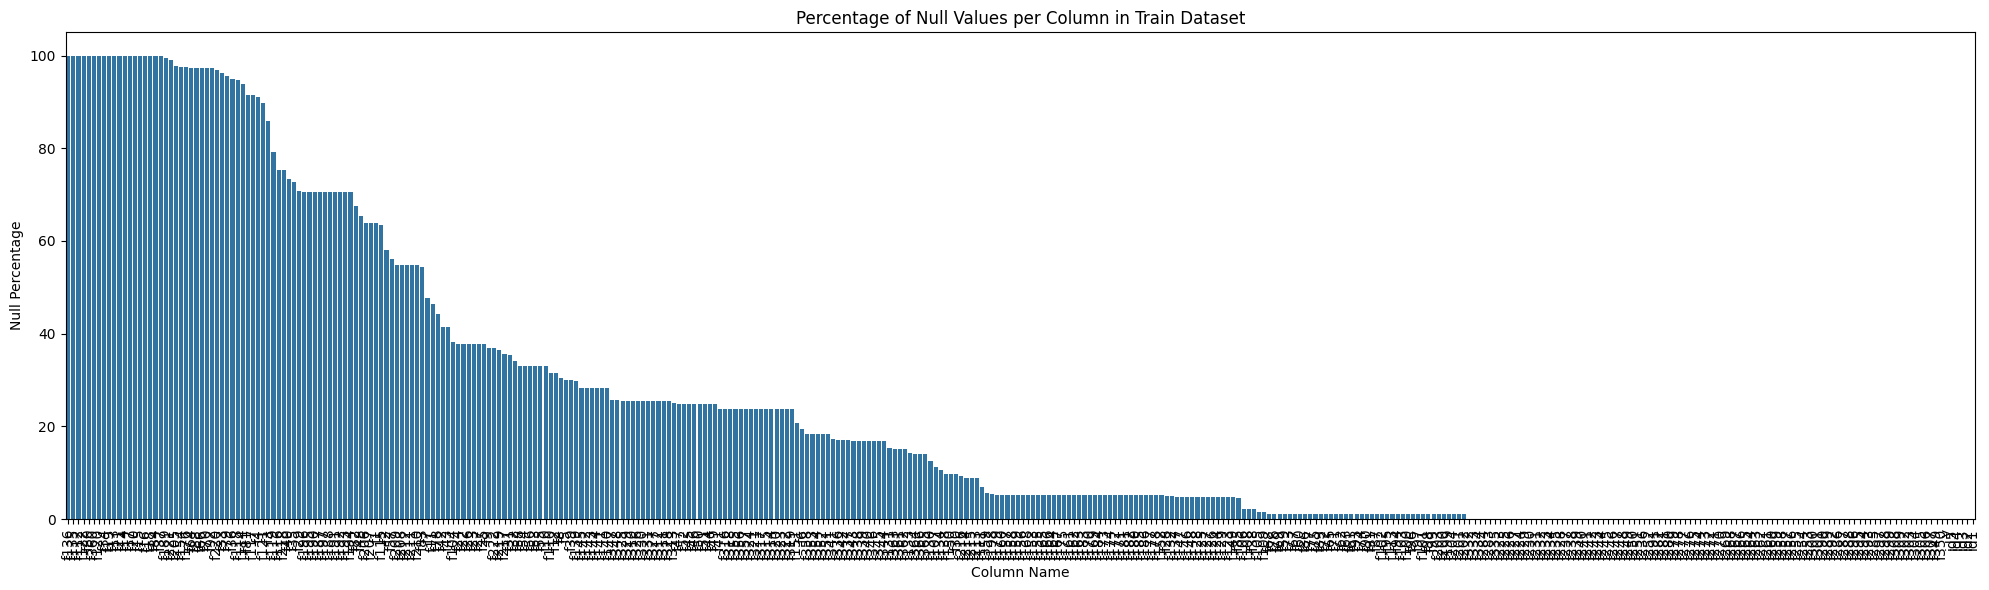

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.barplot(x='Column Name', y='Null Percentage', data=null_percentages_df)
plt.xticks(rotation=90)
plt.title('Percentage of Null Values per Column in Train Dataset')
plt.xlabel('Column Name')
plt.ylabel('Null Percentage')
plt.tight_layout()
plt.show()

In [20]:
plt.show()

## Summary:

### Data Analysis Key Findings

*   The percentage of null values was calculated for each column in the `train` dataset.
*   A DataFrame was created containing column names and their corresponding null percentages, sorted in descending order.
*   A bar chart was successfully generated using seaborn to visualize the null percentages.
*   The plot was customized for better readability by adjusting the figure size, rotating x-axis labels, and adding a title and axis labels.

### Insights or Next Steps

*   Identify columns with a high percentage of null values that may require specific handling (e.g., imputation, removal).
*   Investigate the reasons behind the high null percentages in certain columns to understand potential data collection issues.


In [21]:
# Identify columns with 100% null values
cols_to_drop = null_percentages_df[null_percentages_df['Null Percentage'] == 100]['Column Name'].tolist()

print(f"Columns with 100% null values to drop: {cols_to_drop}")

# Drop the identified columns from the train DataFrame
train_cleaned = train.drop(columns=cols_to_drop)

print(f"Original train shape: {train.shape}")
print(f"Train shape after dropping columns: {train_cleaned.shape}")

Columns with 100% null values to drop: ['f136', 'f135', 'f112', 'f122']
Original train shape: (770164, 372)
Train shape after dropping columns: (770164, 368)


In [22]:
# Count the number of rows for each customer ID
customer_row_counts = train_cleaned['id2'].value_counts()

# Count how many customers have the same number of rows
customer_row_count_distribution = customer_row_counts.value_counts().sort_index()

print("Distribution of the number of rows per customer:")
display(customer_row_count_distribution)

Distribution of the number of rows per customer:


,count
count,
1,9553
2,8801
3,7429
4,5228
5,3109
...,...
450,1
451,1
485,1


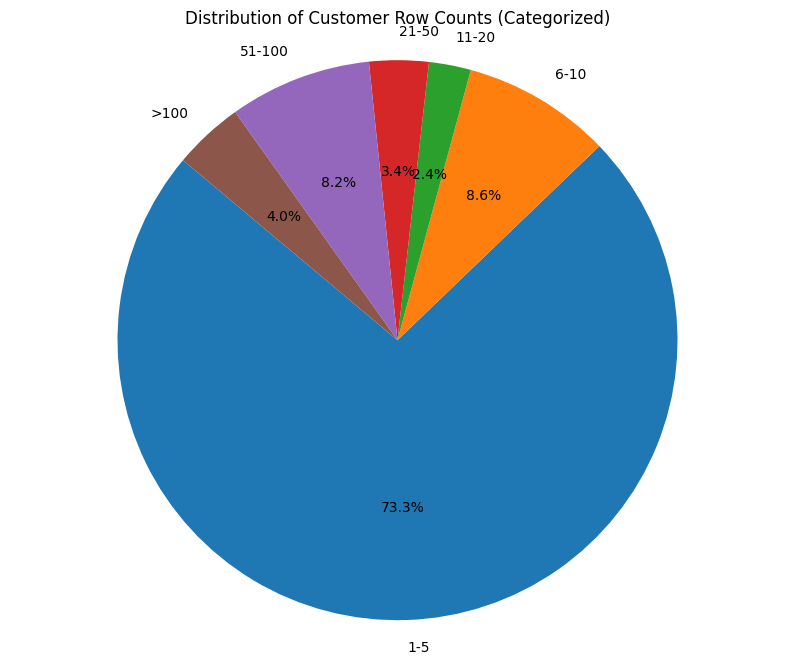

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins for grouping
bins = [0, 5, 10, 20, 50, 100, customer_row_counts.max()]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '>100']

# Group the customer row counts into categories
customer_row_counts_categorized = pd.cut(customer_row_counts, bins=bins, labels=labels, right=True, include_lowest=True)

# Count the number of customers in each category
category_distribution = customer_row_counts_categorized.value_counts().sort_index()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Row Counts (Categorized)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
high_null_cols = null_percentages_df[null_percentages_df['Null Percentage'] > 95]['Column Name'].tolist()
print("Columns with more than 95% null values:")
print(high_null_cols)

Columns with more than 95% null values:
['f136', 'f135', 'f112', 'f122', 'f80', 'f360', 'f120', 'f34', 'f19', 'f13', 'f21', 'f14', 'f17', 'f20', 'f15', 'f16', 'f18', 'f84', 'f37', 'f189', 'f221', 'f205', 'f154', 'f176', 'f64', 'f88', 'f66', 'f70', 'f92', 'f220', 'f33', 'f79']


In [25]:
print("Descriptions for columns with > 95% null values:")
print("------------------------------------------------")
for col in high_null_cols:
    description_row = data_dict[data_dict['masked_column'] == col]
    if not description_row.empty:
        description = description_row['Description'].values[0]
        print(f"{col}: {description}")
    else:
        print(f"{col}: Description not found in data dictionary.")

Descriptions for columns with > 95% null values:
------------------------------------------------
f136: CTR in last 60 days for offer type retail
f135: CTR for last 60 days  for offer type business expenses
f112: If offer type Insurance then ctr in last 180 days
f122: Ratio of ctr in the last 90 days to the ctr in last 180 days for offer type Insurance
f80: Ratio of no of times estatement page is viewed in last 30 days to estatement page viewed in last 180 days
f360: Financial hardship trigger scores for GCS customers
f120: Ratio of ctr in the last 90 days to the ctr in last 180 days for Other non-merchant offer types
f34: Number of emails opted out of in the last 30 days for each CM
f19: Whether a customer has visited Rewards page in the last 30 days
f13: Count of distinct page categories a customer has visited in the last 30 days
f21: Whether a customer has visited page_assist in the last 30 days
f14: Whether a customer has visited Redemption page in the last 30 days
f17: Whether a c

In [26]:
# Define the path to save the cleaned training data
cleaned_train_path = f"{base_path}/train_cleaned.parquet"

# Save the cleaned training data to a parquet file
train_cleaned.to_parquet(cleaned_train_path, index=False)

print(f"train_cleaned DataFrame saved to: {cleaned_train_path}")

train_cleaned DataFrame saved to: /content/drive/MyDrive/AMEXChallenge/train_cleaned.parquet


In [29]:
# Identify categorical columns with missing values
categorical_cols = train_cleaned.select_dtypes(include='object').columns.tolist()
categorical_cols_with_nulls = [col for col in categorical_cols if train_cleaned[col].isnull().sum() > 0]

# Get null percentages for only the categorical columns with nulls
categorical_null_percentages = null_percentages_df[null_percentages_df['Column Name'].isin(categorical_cols_with_nulls)]

# Sort by null percentage in ascending order and select the top 50
cols_to_analyze_least_nulls = categorical_null_percentages.sort_values(by='Null Percentage', ascending=True)['Column Name'].tolist()[:50]

print("Analyzing the following categorical columns with the least missing values:")
print(cols_to_analyze_least_nulls)

Analyzing the following categorical columns with the least missing values:
['f307', 'f306', 'f305', 'f304', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f236', 'f252', 'f291', 'f282', 'f281', 'f280', 'f279', 'f278', 'f277', 'f276', 'f275', 'f274', 'f273', 'f272', 'f271', 'f270', 'f269', 'f268', 'f267', 'f266', 'f265', 'f334', 'f332', 'f333', 'f229', 'f224', 'f227', 'f226', 'f225', 'f223', 'f335', 'f283', 'f284', 'f233', 'f230']


In [33]:
# Find the maximum and minimum of id5 in train data
train_id5_max = train['id5'].max()
train_id5_min = train['id5'].min()

print(f"Train data:")
print(f"Maximum id5: {train_id5_max}")
print(f"Minimum id5: {train_id5_min}")
print("-" * 20)

# Find the maximum and minimum of id5 in test data
test_id5_max = test['id5'].max()
test_id5_min = test['id5'].min()

print(f"Test data:")
print(f"Maximum id5: {test_id5_max}")
print(f"Minimum id5: {test_id5_min}")

Train data:
Maximum id5: 2023-11-03
Minimum id5: 2023-11-01
--------------------
Test data:
Maximum id5: 2023-11-05
Minimum id5: 2023-11-04


In [34]:
# Calculate null percentages for the test dataset
test_null_counts = test.isnull().sum()
test_total_rows = test.shape[0]
test_null_percentages = (test_null_counts / test_total_rows) * 100

# Convert to DataFrame and sort
test_null_percentages_df = test_null_percentages.reset_index()
test_null_percentages_df.columns = ['Column Name', 'Null Percentage']
test_null_percentages_df = test_null_percentages_df.sort_values(by='Null Percentage', ascending=False)

print("Columns with the most null values in the test dataset:")
display(test_null_percentages_df.head(20)) # Displaying top 20 for a good overview

Columns with the most null values in the test dataset:


,Column Name,Null Percentage
139,f135,100.000000
84,f80,100.000000
140,f136,100.000000
126,f122,100.000000
116,f112,100.000000
124,f120,99.992418
364,f360,99.969402
38,f34,99.898998
20,f16,99.878690
24,f20,99.878690


In [35]:
high_null_cols_test = test_null_percentages_df[test_null_percentages_df['Null Percentage'] > 95]['Column Name'].tolist()
print("Columns with more than 95% null values in test dataset:")
print(high_null_cols_test)

Columns with more than 95% null values in test dataset:
['f135', 'f80', 'f136', 'f122', 'f112', 'f120', 'f360', 'f34', 'f16', 'f20', 'f14', 'f15', 'f18', 'f19', 'f17', 'f13', 'f21', 'f84', 'f37', 'f221', 'f189', 'f205', 'f154', 'f176', 'f92', 'f66', 'f70', 'f64', 'f88', 'f33', 'f220', 'f36', 'f79']
